# Data Analysis

#### Importing libraries

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Importing Data frame

In [86]:
data = pd.read_csv("BDS.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  180 non-null    object 
 1   Size       180 non-null    int64  
 2   Time       180 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.3+ KB


,Algorithm,Size,Time
0,QuickSortI,1000,0.000109
1,QuickSortI,1000,0.000090
2,QuickSortI,1000,0.000050
3,QuickSortI,1000,0.000031
4,QuickSortI,1000,0.000026


#### Partitioning the data

In [87]:
# Algorithm names and sizes
algorithms = ["QuickSortI", "QuickSortR"]
sizes = [1000, 10000, 100000]

In [88]:
# Calculating means
means = {}
for algorithm in algorithms:
    for size in sizes:
        filtered_data = data.loc[(data['Algorithm'] == algorithm) & (data['Size'] == size), 'Time']
        means[(algorithm + str(size))] = filtered_data.mean() if not filtered_data.empty else 0
means

{'QuickSortI1000': np.float64(4.7100000000000006e-05),
 'QuickSortI10000': np.float64(0.0010403333333333334),
 'QuickSortI100000': np.float64(0.008881633333333333),
 'QuickSortR1000': np.float64(3.213333333333333e-05),
 'QuickSortR10000': np.float64(0.0008948666666666668),
 'QuickSortR100000': np.float64(0.009425633333333334)}

#### Bar graphs

{'QuickSortI1000': np.float64(4.7100000000000006e-05), 'QuickSortI10000': np.float64(0.0010403333333333334), 'QuickSortI100000': np.float64(0.008881633333333333), 'QuickSortR1000': np.float64(3.213333333333333e-05), 'QuickSortR10000': np.float64(0.0008948666666666668), 'QuickSortR100000': np.float64(0.009425633333333334)}


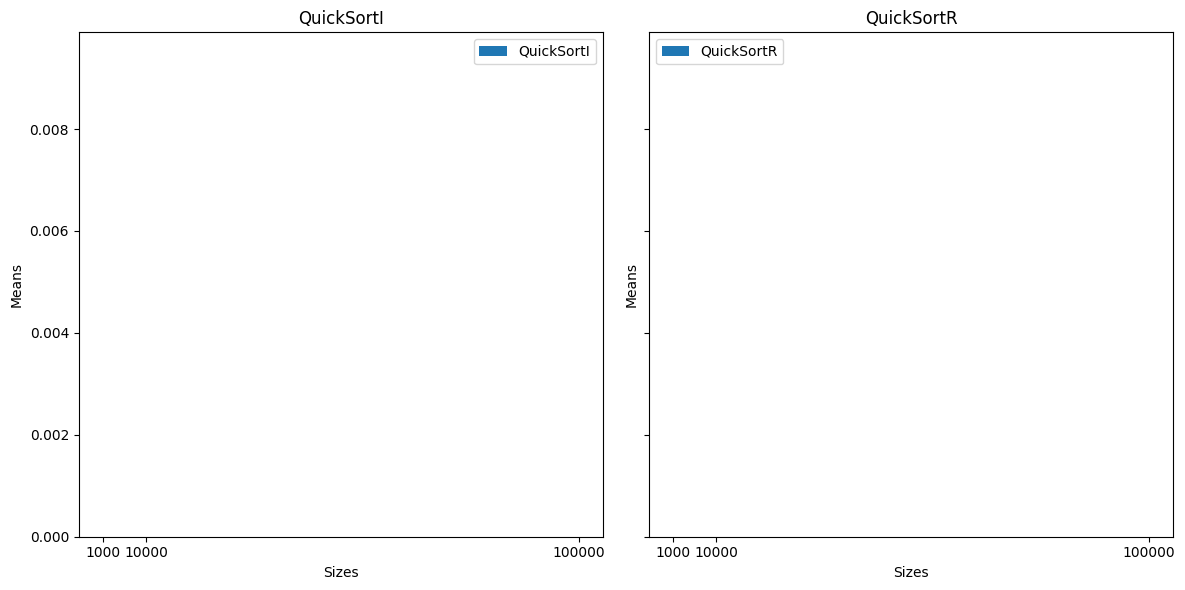

In [107]:
print(means)
fig, ax = plt.subplots(1, len(algorithms), figsize=(12, 6), sharey=True)

for col, algorithm in enumerate(algorithms):
    y_values = [means[(algorithm + str(size))] for size in sizes]
    ax[col].bar(sizes, y_values, label=algorithm)
    ax[col].set_title(algorithm)
    ax[col].set_ylabel('Means')
    ax[col].set_xlabel('Sizes')
    ax[col].set_xticks(sizes)
    ax[col].set_xticklabels(sizes)
    ax[col].legend()

plt.tight_layout()
plt.show()